In [2]:
!pip install pmdarima

In [6]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Fix for Matplotlib style
plt.style.use("seaborn-v0_8-darkgrid")

# ARIMA
#import statsmodels.api as sm
#from pmdarima import auto_arima

# LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load stock data (e.g., Apple Inc.)
import yfinance as yf
df = yf.download("TATAMOTORS.NS", start="2023-01-24", end=pd.to_datetime("today").strftime('%Y-%m-%d'))

# Keep only the 'Close' price
df = df[['Close']]

df.dropna(inplace=True)
df.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,TATAMOTORS.NS
Date,
2023-01-24,419.543701
2023-01-25,416.462830
2023-01-27,442.848938
2023-01-30,440.910950
2023-01-31,449.308777


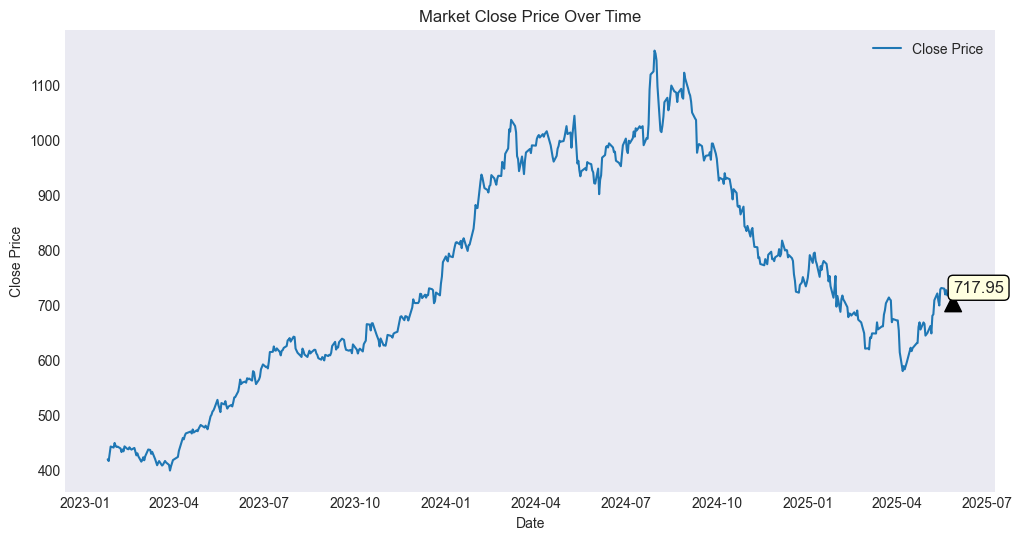

In [7]:
# Plot the data
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')

# Get the latest date and price
latest_date = df.index[-1]
latest_price = float(df['Close'].iloc[-1])  # Convert to float explicitly

# Annotate the current price
plt.annotate(f"{latest_price:.2f}",
             xy=(latest_date, latest_price),
             xytext=(latest_date, latest_price + 5),  # Offset the label
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="lightyellow"))

plt.title("Market Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid()
plt.legend()
plt.show()


In [8]:

# 3. Train-Test Split


# Convert index to datetime and sort
df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)

# Define training data up to yesterday, testing for today
train_data = df[df.index < pd.to_datetime("today").normalize()]
test_data = df[df.index >= pd.to_datetime("today").normalize()]



In [9]:
# 3. Train-Test Split


# Convert index to datetime and sort
df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)

# Define training data up to yesterday, testing for today
train_data = df[df.index < pd.to_datetime("today").normalize()]
test_data = df[df.index >= pd.to_datetime("today").normalize()]


In [10]:
def predict_market_price(df, model, scaler, days=4):
    df_scaled = scaler.transform(df[-sequence_length:])
    seq_input = np.reshape(df_scaled, (1, sequence_length, 1))

    predictions = []
    input_seq = seq_input.copy()
    
    for _ in range(days):
        pred = model.predict(input_seq)
        predictions.append(pred[0][0])
        input_seq = np.append(input_seq[:, 1:, :], [[[pred[0][0]]]], axis=1)

    # Convert back to original scale
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
    prediction_dates = pd.date_range(start=pd.to_datetime("today"), periods=days, freq='B')

    return pd.DataFrame(predictions, index=prediction_dates, columns=["LSTM_Prediction"])


In [12]:
# Display predicted values for today and tomorrow
predictions = predict_market_price(df[['Close']], model, scaler, days=4)

print("Predictions for Today and Tomorrow:")
print(predictions)


NameError: name 'model' is not defined